## Amazon Product Reviews Sentiment Analysis with Python



In [ ]:
# import nltk
# nltk.download('vader_lexicon')

### Import important libraries

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

### Import data from a text file

In [15]:
data = pd.read_csv("Amazon.txt", delimiter='\t')


In [44]:
data.head(10)

,rating,date,variation,verified_reviews,feedback,Positive,Negative,Neutral
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,0.692,0.000,0.308
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,0.807,0.000,0.193
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,0.114,0.102,0.784
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,0.383,0.000,0.617
4,5,31-Jul-18,Charcoal Fabric,Music,1,0.000,0.000,1.000
5,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1,0.302,0.000,0.698
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1,0.124,0.076,0.800
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1,0.113,0.000,0.887
8,5,30-Jul-18,Heather Gray Fabric,looks great,1,0.804,0.000,0.196
9,5,30-Jul-18,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1,0.387,0.000,0.613


### Meta Information

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


### Summary Statistics

In [18]:
data.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


### Pie chart to see the ratio of ratings

In [36]:
ratings=data["rating"].value_counts()
ratings

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

In [37]:
number = ratings.index
quantity = ratings.values

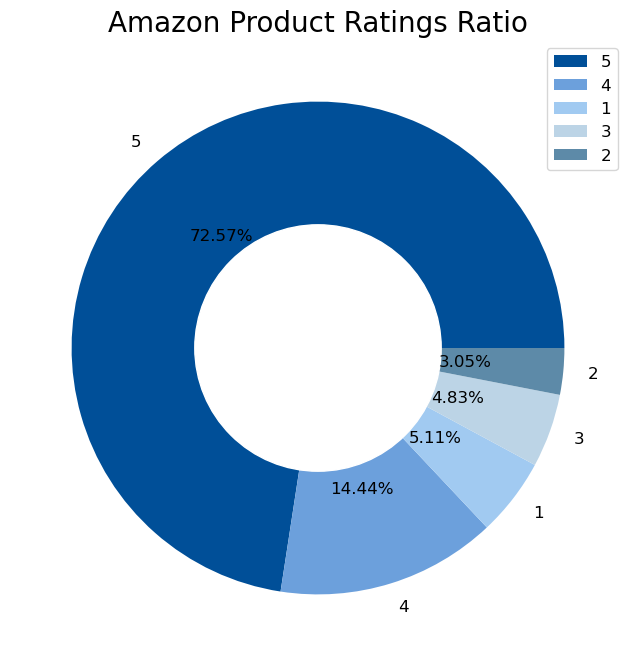

In [49]:
custom_colors = ["#004F98", '#6CA0DC',"#A1CAF1", '#BCD4E6', "#5D8AA8"]
plt.figure(figsize=(8, 8))
plt.pie(quantity, labels=number, colors=custom_colors, autopct="%1.2f%%")
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Amazon Product Ratings Ratio", fontsize=20)
plt.legend()
plt.show()

### Sentiment Analysis of Amazon Product Reviews

In [39]:
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["verified_reviews"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["verified_reviews"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["verified_reviews"]]

In [41]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z=sum(data["Neutral"])


In [118]:
print("Positive : ",round(x,2))
print("Negetive : ",round(y,2))
print("Neutral : ",round(z,2))

Positive :  1035.46
Negetive :  96.8
Neutral :  1936.74


In [42]:
def sentiment_score(a,b,c):
    if(a>b) and (a>c):
        print("Positive")
    elif(b>a) and (b>c):
        print ("Negative")
    else:
        print("Neutral")


In [107]:
sentiment_score(x,y,z)

Neutral


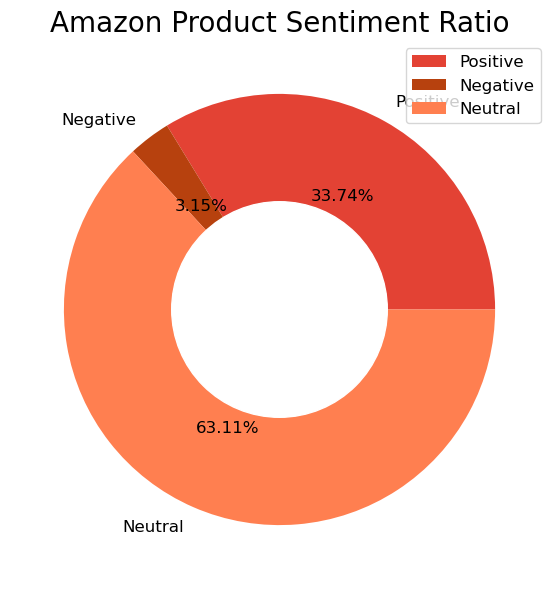

In [109]:
# Display the chart

plt.figure(figsize=(7, 7))
custom_colors = ["#E34234", '#B7410E',"#FF7F50"]
plt.pie(sizes, labels=labels, colors=custom_colors, autopct="%1.2f%%")
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.title("Amazon Product Sentiment Ratio", fontsize=20)
plt.legend()

plt.show()

### Summary
So we can say that most of the reviews of the products available on Amazon are positive, as the total sentiment scores of Positive and Neural are much higher than Negative scores.